In [1]:
# Import libraries (Load the conda environment from the sc_decision_tree_env.txt file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

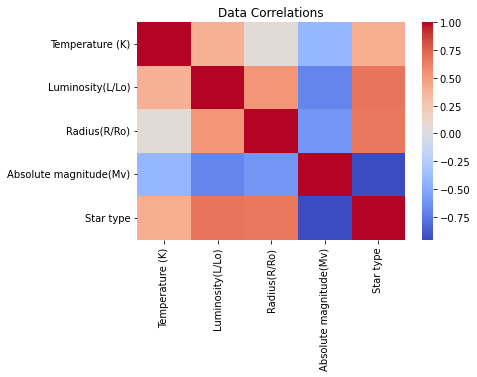

In [2]:
# Load/Visualize data
dataset = pd.read_csv("data/dataset.csv")

plt.figure()
sns.heatmap(dataset.corr(), cmap='coolwarm')
plt.title("Data Correlations")
plt.show()

# Light feature selection
dataset = dataset.drop(columns=["Star color", "Spectral Class"])

In [3]:
# Split into train/test and x/y
dataset = dataset.sample(frac=1)
train = dataset[:200]
test = dataset[200:]

train_X = train.iloc[:,:-1]
train_Y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_Y = test.iloc[:,-1]

In [4]:
# Fit sklearn DecisionTreeClassifier over training data
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)

# Fit sklearn RandomForestClassifier over training data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

RandomForestClassifier()

Correctly classified 40 of 40 stars in the test set using the decision tree classifier
Correctly classified 40 of 40 stars in the test set using the random forest classifier
The decision tree classifies Proxima Centauri as a Red Dwarf star
The random forest classifies Proxima Centauri as a Red Dwarf star


c:\Users\Vince\anaconda3\envs\sc_decision_tree\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vince\anaconda3\envs\sc_decision_tree\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


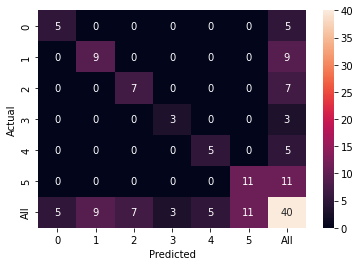

In [7]:
# Test accuracy on testing data
test_y_hat_dt = dt.predict(test_X)
test_y_hat_rf = rf.predict(test_X)

print("Correctly classified", np.sum(test_Y == test_y_hat_dt), "of", len(test_Y), "stars in the test set using the decision tree classifier")
print("Correctly classified", np.sum(test_Y == test_y_hat_rf), "of", len(test_Y), "stars in the test set using the random forest classifier")
types = ["Red Dwarf", "Brown Dwarf", "White Dwarf", "Main Sequence", "SuperGiants", "HyperGiants"]
print("The decision tree classifies Proxima Centauri as a", types[dt.predict([[3042, 0.0017, 0.1542, 15.60]])[0]], "star")
print("The random forest classifies Proxima Centauri as a", types[rf.predict([[3042, 0.0017, 0.1542, 15.60]])[0]], "star")

# Print plot of predicted vs actual
confusion_matrix = pd.crosstab(test_Y, test_y_hat_dt, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

confusion_matrix = pd.crosstab(test_Y, test_y_hat_rf, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [6]:
# Save Models
import pickle

pickle.dump(dt, open('./deploy/dt.pkl', 'wb'))
pickle.dump(rf, open('./deploy/rf.pkl', 'wb'))
